# Testing ProbaVis Class

## Imports

In [1]:
import importlib

import pandas as pd
from ipywidgets import interactive

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.datasets import make_classification

import multiclass_proba_contour as mpc

In [2]:
# importlib.reload(mpc)

## Generate a Data Set

In [3]:
data, target = make_classification(
    n_samples=160, n_features=3, n_informative=3, n_redundant=0,
    n_classes=6, n_clusters_per_class=1, weights=[.2,.2,.1,.1,.1,.3], scale=[5,2,3],
    hypercube=False, class_sep=10, random_state=7
)

data = pd.DataFrame(data, columns=[f"Feature #{x}" for x in range(data.shape[1])])

## Logistic Regression

In [4]:
test = mpc.ProbaVis(LogisticRegression(max_iter=1000), data, target, [2,1], grid_res=(200,100))

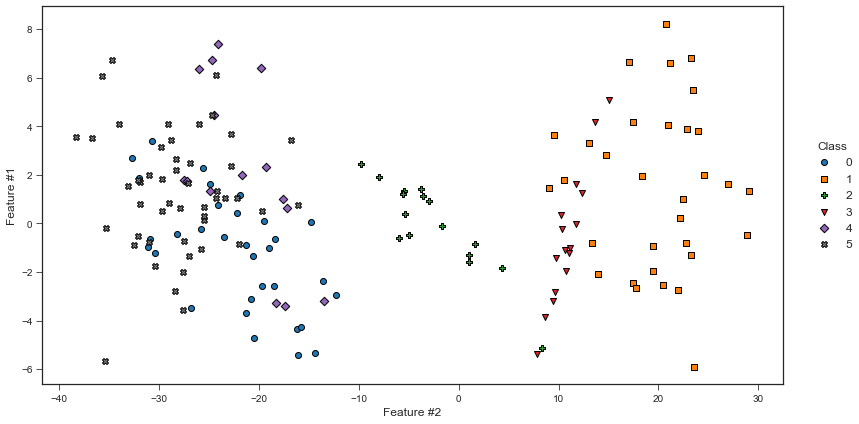

In [5]:
test.plot(contour_on=False)

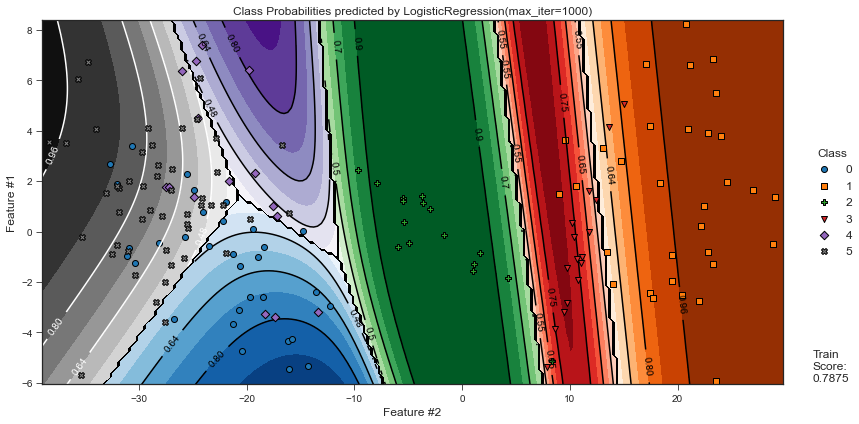

In [6]:
test.plot()

## Boosting

In [7]:
test.set_model(HistGradientBoostingClassifier(random_state=1))

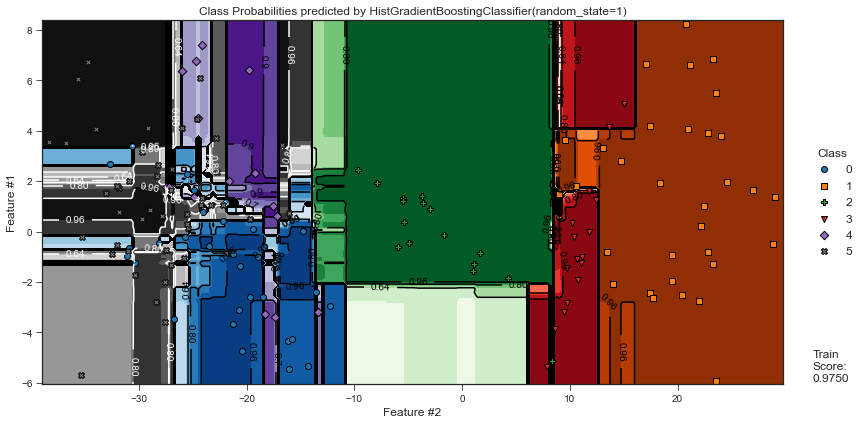

In [8]:
test.plot()

## Random Forest

In [9]:
test.set_model(RandomForestClassifier(random_state=1, min_impurity_decrease=.01))

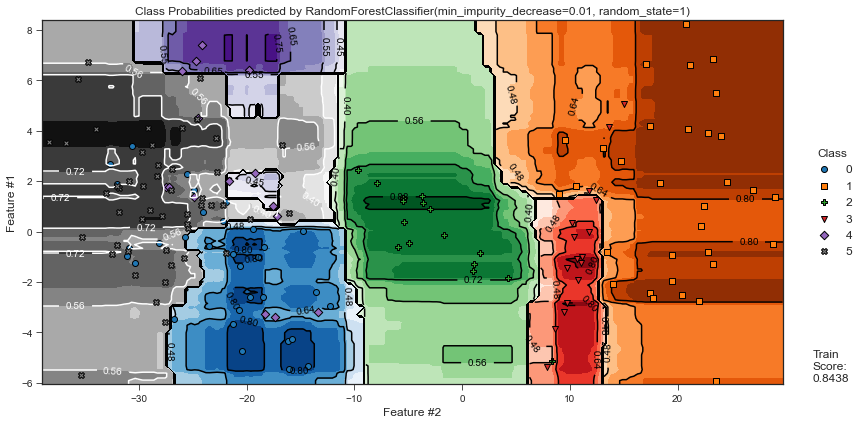

In [10]:
test.plot()

In [11]:
interactive(
    test.replot,
    contour_on = [True, False],
    criterion=["gini", "entropy"],
    n_estimators=(1,150), 
    max_depth=(1,20),
    min_samples_leaf=(1,10),
    min_impurity_decrease=(0, 0.02, 0.01)
)

interactive(children=(Dropdown(description='contour_on', options=(True, False), value=True), Dropdown(descript…